In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [237]:
df = pd.read_csv("vgsales.csv")

### Getting to know the data

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [239]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [240]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [241]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Amount of data for each year

In [242]:
data_distribution = df["Year"].value_counts().sort_index()
data_distribution

1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     349
2001.0     482
2002.0     829
2003.0     775
2004.0     763
2005.0     941
2006.0    1008
2007.0    1202
2008.0    1428
2009.0    1431
2010.0    1259
2011.0    1139
2012.0     657
2013.0     546
2014.0     582
2015.0     614
2016.0     344
2017.0       3
2020.0       1
Name: Year, dtype: int64

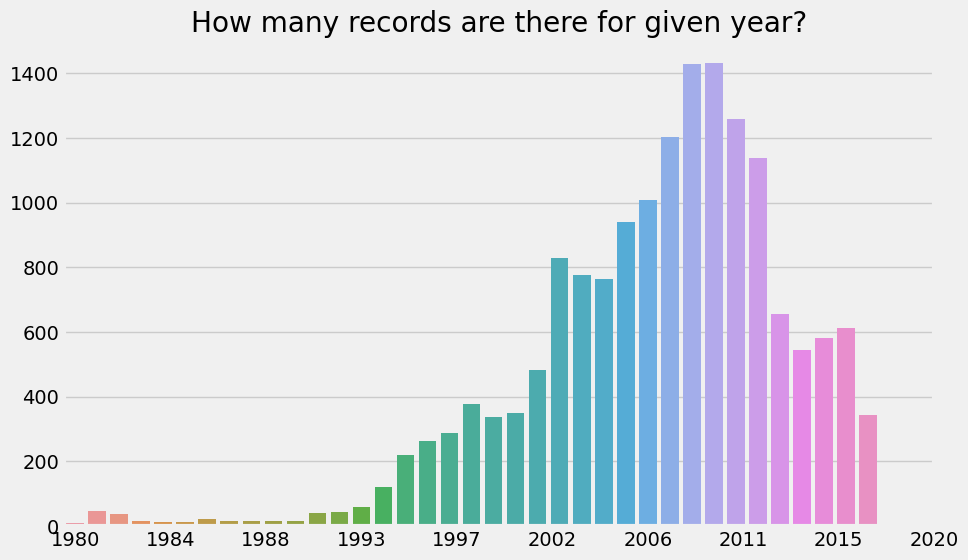

In [320]:
sns.barplot(x=data_distribution.index,y=data_distribution.values)
plt.xticks(np.linspace(0,len(data_distribution),10),np.linspace(min(data_distribution.index),max(data_distribution.index),10)\
          .astype("int64"))
plt.title("How many records are there for given year?")
plt.show()

It's noticeable that there isn't much data available beyond 2016, while there's a considerable amount of data from 2006 to 2011. It's ambiguous whether the dataset has a data shortage or the game industry reached its peak during that period. However, based on my investigation, it seems that 2006-2011 was indeed the game industry's prime, making the data reliable except for the small number of records from after 2016. So years 2017-2020 will be ignored.

In [244]:
df = df.loc[df["Year"] <=2016]

Is every single game associated to one platform and genre only and is there only oner record per game?

In [245]:
df.loc[df["Name"] == "Wii Sports"]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


In [246]:
df.loc[df["Name"] == "Pokemon Red/Pokemon Blue"]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.0,31.37


Games chosed randomly suggest that there is only one record per game title and that every game is associated to only on 
genre and platform. To confirm this assumption, we can use the "value_counts" function, which will count the number of appearances of each game title.

In [247]:
df["Name"].value_counts()

Need for Speed: Most Wanted    12
FIFA 14                         9
Ratatouille                     9
LEGO Marvel Super Heroes        9
Madden NFL 08                   8
                               ..
PGA Tour 96                     1
Game & Wario                    1
Angry Birds                     1
Shadow Hearts: Covenant         1
Know How 2                      1
Name: Name, Length: 11357, dtype: int64

How many titles in total appear more than 1 time?

In [248]:
(df["Name"].value_counts() > 1).sum()

2716

And how titles are associated to more than one platform?

In [249]:
(df.groupby("Name")["Platform"].unique().str.len() > 1).sum()

2716

We found out that our initial assumption that there is only one record for each game title was not correct. Instead, there are some game titles that appear multiple times, exactly 2775 titles appear more than one time in the dataset. Also there are 2774 records that have same titles for multiple platforms. Let's invesitage it futher

In [250]:
df.loc[df["Name"] == "Need for Speed: Most Wanted"].sort_values("Year")

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
252,253,Need for Speed: Most Wanted,PS2,2005.0,Racing,Electronic Arts,2.03,1.79,0.08,0.47,4.37
1530,1532,Need for Speed: Most Wanted,X360,2005.0,Racing,Electronic Arts,1.00,0.17,0.02,0.10,1.29
2005,2007,Need for Speed: Most Wanted,XB,2005.0,Racing,Electronic Arts,0.53,0.46,0.00,0.05,1.04
3585,3587,Need for Speed: Most Wanted,GC,2005.0,Racing,Electronic Arts,0.43,0.11,0.00,0.02,0.56
5900,5902,Need for Speed: Most Wanted,PC,2005.0,Racing,Electronic Arts,0.02,0.23,0.00,0.05,0.30
6278,6280,Need for Speed: Most Wanted,DS,2005.0,Racing,Electronic Arts,0.24,0.01,0.00,0.02,0.27
6492,6494,Need for Speed: Most Wanted,GBA,2005.0,Racing,Electronic Arts,0.19,0.07,0.00,0.00,0.26
498,499,Need for Speed: Most Wanted,PS3,2012.0,Racing,Electronic Arts,0.71,1.51,0.06,0.61,2.89
1173,1175,Need for Speed: Most Wanted,X360,2012.0,Racing,Electronic Arts,0.62,0.80,0.01,0.15,1.58
1742,1744,Need for Speed: Most Wanted,PSV,2012.0,Racing,Electronic Arts,0.38,0.52,0.01,0.25,1.16


In [251]:
df.loc[df["Name"] == "FIFA 14"].sort_values("Year")

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
112,113,FIFA 14,PS3,2013.0,Sports,Electronic Arts,0.78,4.32,0.07,1.73,6.90
256,257,FIFA 14,X360,2013.0,Sports,Electronic Arts,0.92,2.93,0.01,0.46,4.31
493,494,FIFA 14,PS4,2013.0,Sports,Electronic Arts,0.61,1.85,0.11,0.33,2.90
1698,1700,FIFA 14,XOne,2013.0,Sports,Electronic Arts,0.41,0.66,0.00,0.12,1.19
3988,3990,FIFA 14,PSV,2013.0,Sports,Electronic Arts,0.11,0.25,0.01,0.13,0.50
4503,4505,FIFA 14,PC,2013.0,Sports,Electronic Arts,0.01,0.36,0.00,0.06,0.43
4538,4540,FIFA 14,Wii,2013.0,Sports,Electronic Arts,0.00,0.38,0.00,0.05,0.43
6661,6663,FIFA 14,3DS,2013.0,Sports,Electronic Arts,0.00,0.23,0.00,0.03,0.25
7034,7036,FIFA 14,PSP,2013.0,Sports,Electronic Arts,0.00,0.16,0.00,0.07,0.23


"FIFA 14" and "Need for Speed: Most Wanted" samples prove that game released in same year can have multiple platform associated. But we still don't know if one title can be associated to multiple genres.

In [252]:
# group by game title and count titles which have more than 1 genre
(df.groupby("Name")["Genre"].unique().str.len() > 1)
df.set_index("Name")["Genre"][(df.groupby("Name")["Genre"].unique().str.len() > 1)].sort_index()

Name
Culdcept                                     Misc
Culdcept                                 Strategy
Little Busters! Converted Edition       Adventure
Little Busters! Converted Edition       Adventure
Little Busters! Converted Edition          Action
Steins;Gate: Hiyoku Renri no Darling    Adventure
Steins;Gate: Hiyoku Renri no Darling       Action
Steins;Gate: Hiyoku Renri no Darling    Adventure
Syndicate                                 Shooter
Syndicate                                 Shooter
Syndicate                                Strategy
Name: Genre, dtype: object

In [253]:
df.loc[df["Name"] == "Culdcept"]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
8678,8680,Culdcept,3DS,2012.0,Misc,Nintendo,0.00,0.00,0.16,0.0,0.16
14553,14556,Culdcept,PS2,2002.0,Strategy,Sega,0.01,0.01,0.00,0.0,0.03


"Culdcept" game seems not to prove that there are other genres associated to one title, these 2 records we got by checking
record for "Culdcept" suggest that these are different games or some kind of remasters, let's keep exploring

In [254]:
df.loc[df["Name"].isin(["Little Busters! Converted Edition","Steins;Gate: Hiyoku Renri no Darling","Syndicate"])]\
.sort_values("Name")

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
13045,13047,Little Busters! Converted Edition,PS2,2009.0,Adventure,Prototype,0.00,0.00,0.05,0.00,0.05
13666,13668,Little Busters! Converted Edition,PSP,2010.0,Adventure,Prototype,0.00,0.00,0.04,0.00,0.04
14857,14860,Little Busters! Converted Edition,PSV,2012.0,Action,Prototype,0.00,0.00,0.03,0.00,0.03
11437,11439,Steins;Gate: Hiyoku Renri no Darling,X360,2011.0,Adventure,5pb,0.00,0.00,0.08,0.00,0.08
12625,12627,Steins;Gate: Hiyoku Renri no Darling,PSP,2012.0,Action,5pb,0.00,0.00,0.06,0.00,0.06
15457,15460,Steins;Gate: Hiyoku Renri no Darling,PS3,2012.0,Adventure,5pb,0.00,0.00,0.02,0.00,0.02
8000,8002,Syndicate,X360,2012.0,Shooter,Electronic Arts,0.10,0.06,0.00,0.02,0.18
8839,8841,Syndicate,PS3,2012.0,Shooter,EA Games,0.07,0.06,0.00,0.02,0.15
12526,12528,Syndicate,PC,1992.0,Strategy,Electronic Arts,0.00,0.05,0.00,0.01,0.06


As we can see only for "Steins;Gate: Hiyoku Renri no Darling" and "Syndicate" there are more than 1 recrod where year of the release match and genres differ, but 2 games out of 16598 are just outliers

To sum up, the dataset is large and has been well-prepared, making it ideal for further analysis. Unique game titles can be assigned to multiple platforms but not to multiple genres, only 2 records are associated to 2 genres which is outlier

## Exploring the data futher (EDA)

In [255]:
plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams['font.family']= "sans"


### Let's analyse best-selling games

We know that there are over 2700 games with more than one record, in case of analysing total sales it makes sense to aggregate these duplicate titles, for example we can have one game with 2 records because it was released for 2 different platforms and to get total sales of that game we have to add these values. We don't want to aggregate the main DataFrame (df) because spliting records into different platforms, genres and years for same game titles will be very convinient for other analysis.

In [256]:
# grouping data by title, assigning year as the first release year, and adding all sales columns which belong to the same game
games_by_total_sell = df.groupby("Name").agg({"Year":"min","NA_Sales":"sum","EU_Sales":"sum",
                                              "JP_Sales":"sum","Global_Sales":"sum","Genre":lambda x: list(x),
                                              "Platform":lambda x: list(x)})
games_by_total_sell.reset_index(inplace=True)

In [257]:
# sorting games by total sales
games_by_total_sell.sort_values("Global_Sales",ascending=False,inplace=True)
# adding column containing name and year of game release for more informative plotting
year_as_string = games_by_total_sell["Year"].astype("str").str.split(".").apply(lambda x: x[0])
games_by_total_sell["Name_And_Year"] = games_by_total_sell["Name"]+ "(" + year_as_string + ")"
games_by_total_sell.head()

,Name,Year,NA_Sales,EU_Sales,JP_Sales,Global_Sales,Genre,Platform,Name_And_Year
10880,Wii Sports,2006.0,41.49,29.02,3.77,82.74,[Sports],[Wii],Wii Sports(2006)
3663,Grand Theft Auto V,2013.0,23.46,23.04,1.39,55.92,"[Action, Action, Action, Action, Action]","[PS3, X360, PS4, XOne, PC]",Grand Theft Auto V(2013)
9226,Super Mario Bros.,1985.0,32.48,4.88,6.96,45.31,"[Platform, Platform]","[NES, GB]",Super Mario Bros.(1985)
9608,Tetris,1988.0,26.17,2.95,6.03,35.84,"[Puzzle, Puzzle]","[GB, NES]",Tetris(1988)
5506,Mario Kart Wii,2008.0,15.85,12.88,3.79,35.82,[Racing],[Wii],Mario Kart Wii(2008)


Top 10 bestsellers of all time

Text(0.5, 1.0, 'All time bestsellers')

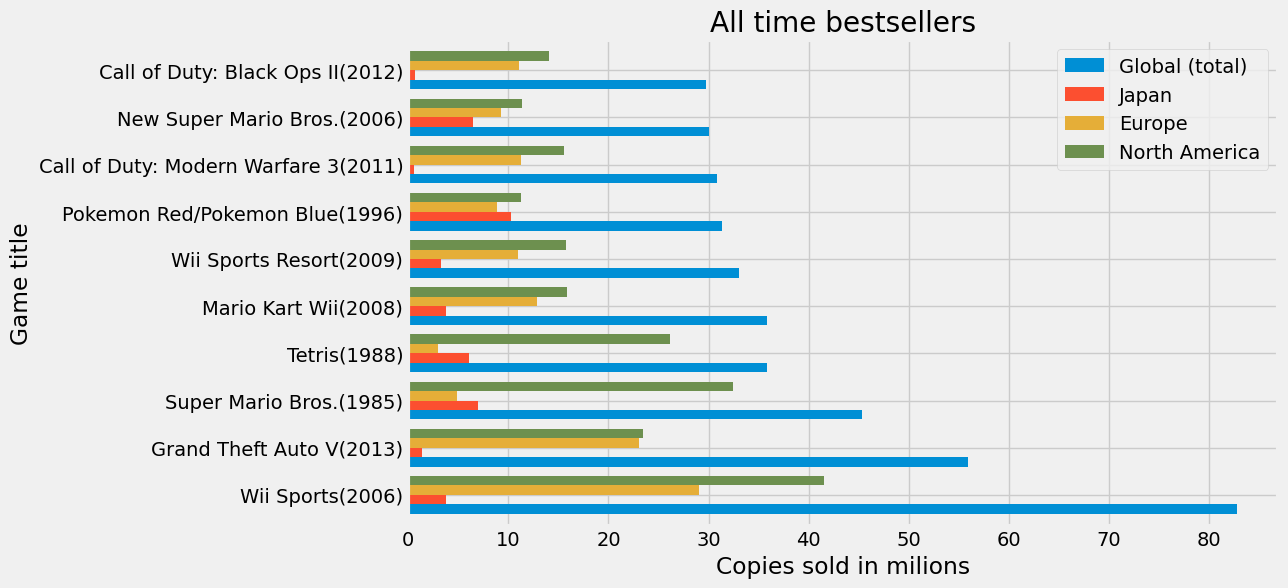

In [258]:
bar_plot = games_by_total_sell[:10].set_index("Name_And_Year")[["Global_Sales","JP_Sales","EU_Sales","NA_Sales"]].plot(kind="barh",                                                                                                              width=0.8)
bar_plot.legend(["Global (total)", "Japan", "Europe", "North America"])
plt.ylabel("Game title")
plt.xlabel("Copies sold in milions")
plt.title("All time bestsellers")

Top 10 bestsellers of modern days

In [259]:
# pick games released during or after 2010
games_by_total_sell_modern = games_by_total_sell.loc[games_by_total_sell["Year"] >= 2010]

Text(0.5, 1.0, 'Modern day bestsellers')

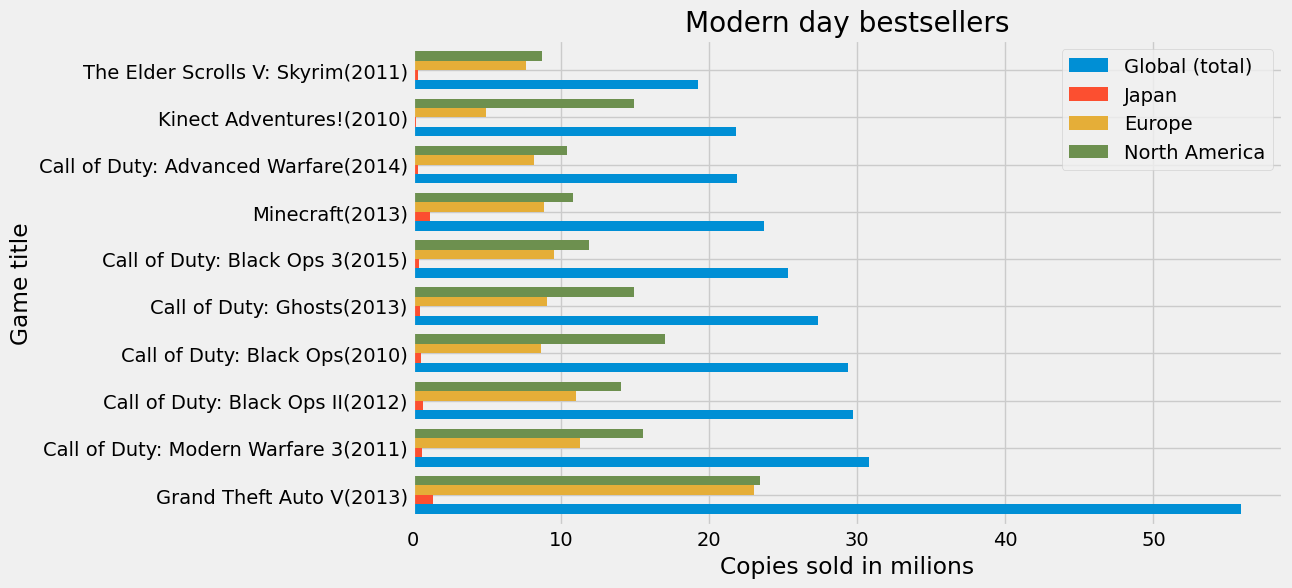

In [260]:
bar_plot = games_by_total_sell_modern[:10].set_index("Name_And_Year")[["Global_Sales","JP_Sales","EU_Sales","NA_Sales"]]\
.plot(kind="barh",width=0.8)                                                                                                              
bar_plot.legend(["Global (total)", "Japan", "Europe", "North America"])
plt.ylabel("Game title")
plt.xlabel("Copies sold in milions")
plt.title("Modern day bestsellers")

Top 10 bestsellers by different game genres

In [261]:
# let's investigate which genres are most popular
df["Genre"].value_counts()

Action          3252
Sports          2304
Misc            1710
Role-Playing    1469
Shooter         1282
Adventure       1276
Racing          1226
Platform         876
Simulation       850
Fighting         836
Strategy         671
Puzzle           571
Name: Genre, dtype: int64

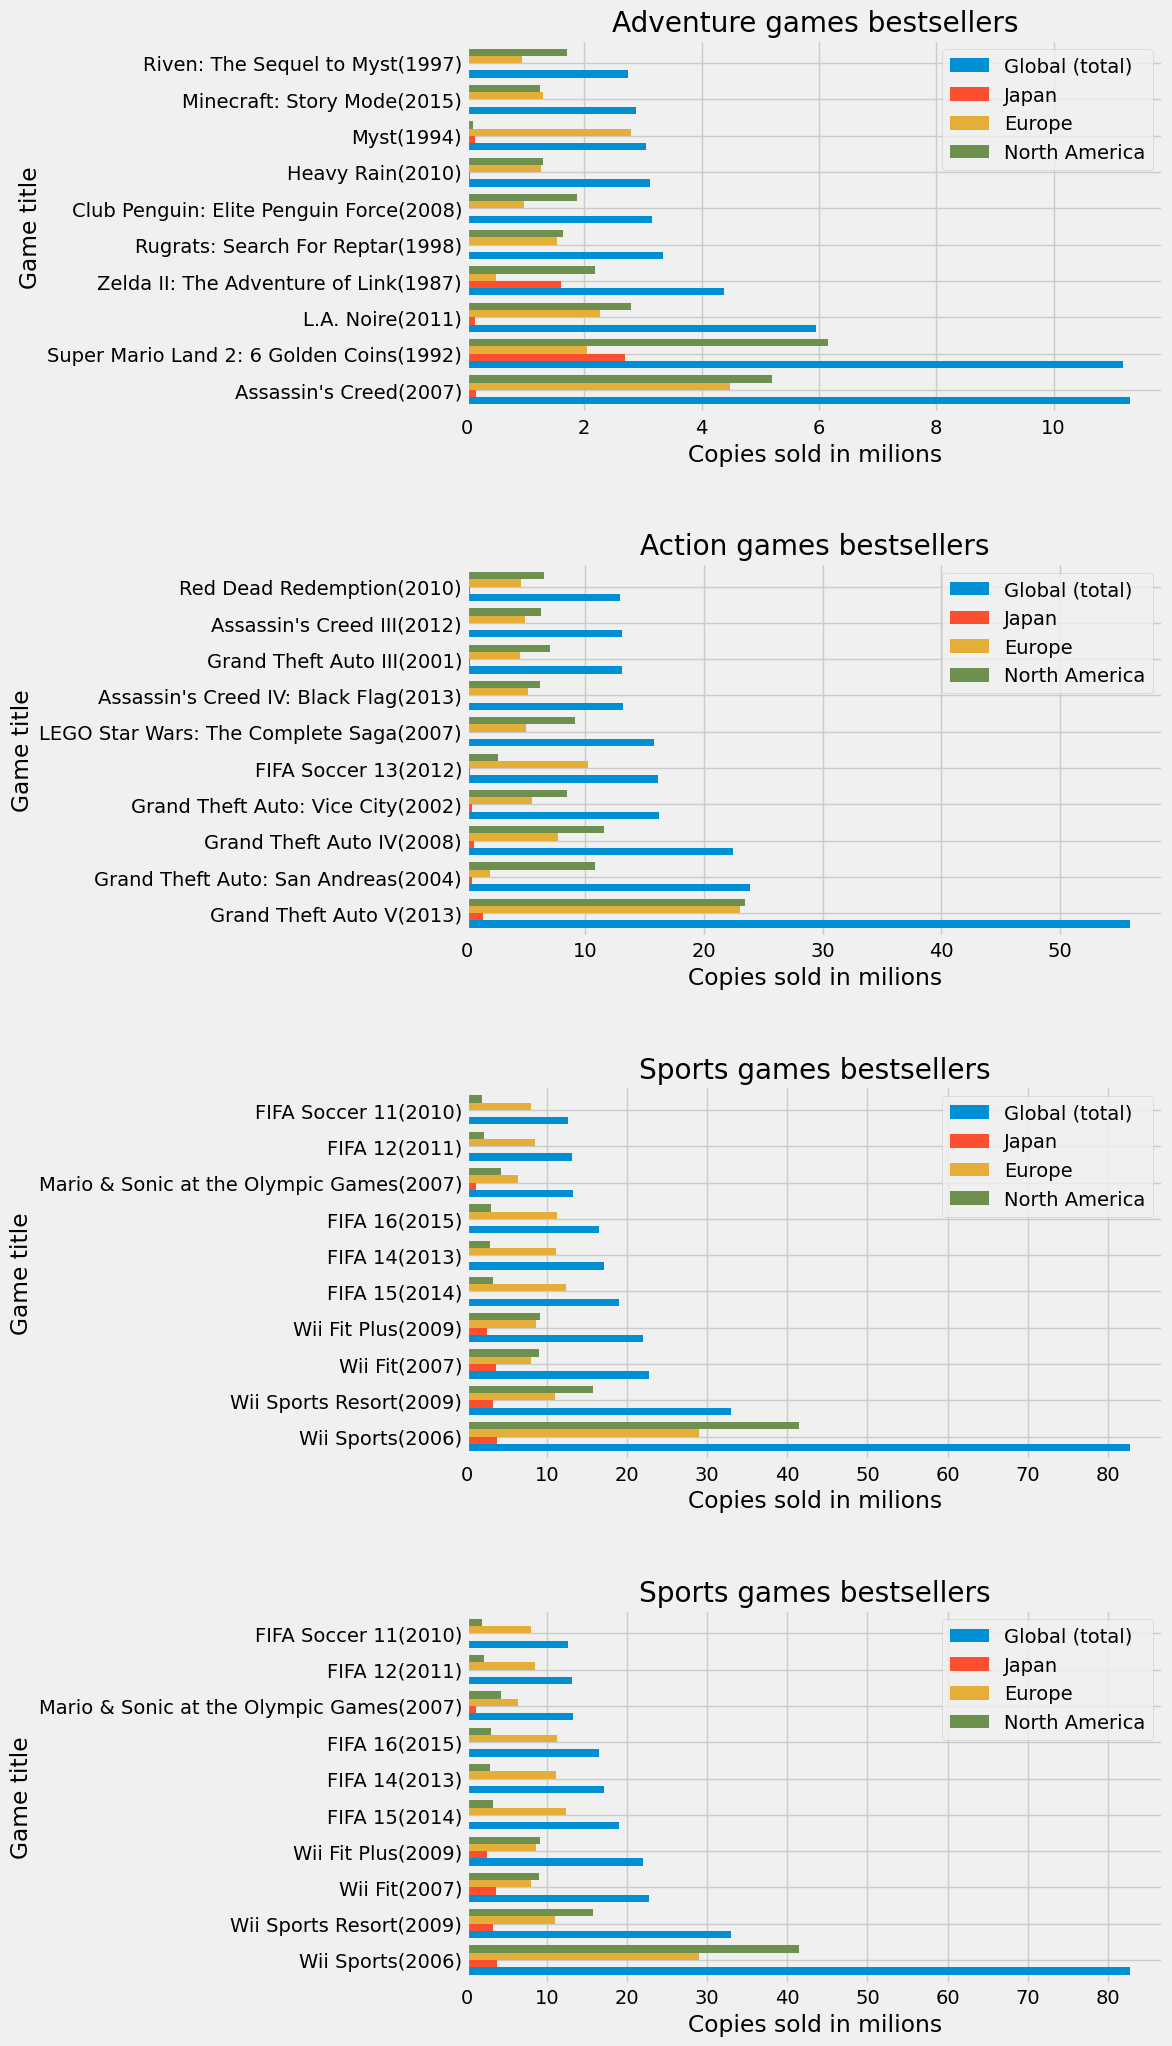

In [262]:
# display bestsellers for 4 genre types
fig, ax = plt.subplots(4,1,figsize=(8,24))
fig.subplots_adjust(hspace=0.4)

# let's automate adding plots to figure/dashboard
def add_barplot(filter_by,subcategory,axis):
    
    data = games_by_total_sell.loc[games_by_total_sell[filter_by].apply(lambda x: subcategory in x)]
    data[:10].set_index("Name_And_Year")[["Global_Sales","JP_Sales","EU_Sales","NA_Sales"]]\
    .plot(kind="barh",width=0.8,ax=ax[axis])

    ax[axis].legend(["Global (total)", "Japan", "Europe", "North America"])
    ax[axis].set_ylabel("Game title")
    ax[axis].set_xlabel("Copies sold in milions")
    ax[axis].title.set_text(f"{subcategory} games bestsellers")
    
add_barplot("Genre","Adventure",0) 
add_barplot("Genre","Action",1)  
add_barplot("Genre","Sports",2)
add_barplot("Genre","Sports",3)


Top 10 bestsellers by different platforms

In [263]:
# let's investigate which platforms are most popular
df["Platform"].value_counts()

DS      2132
PS2     2127
PS3     1304
Wii     1290
X360    1235
PSP     1197
PS      1189
PC       943
GBA      811
XB       803
GC       542
3DS      500
PSV      410
PS4      335
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

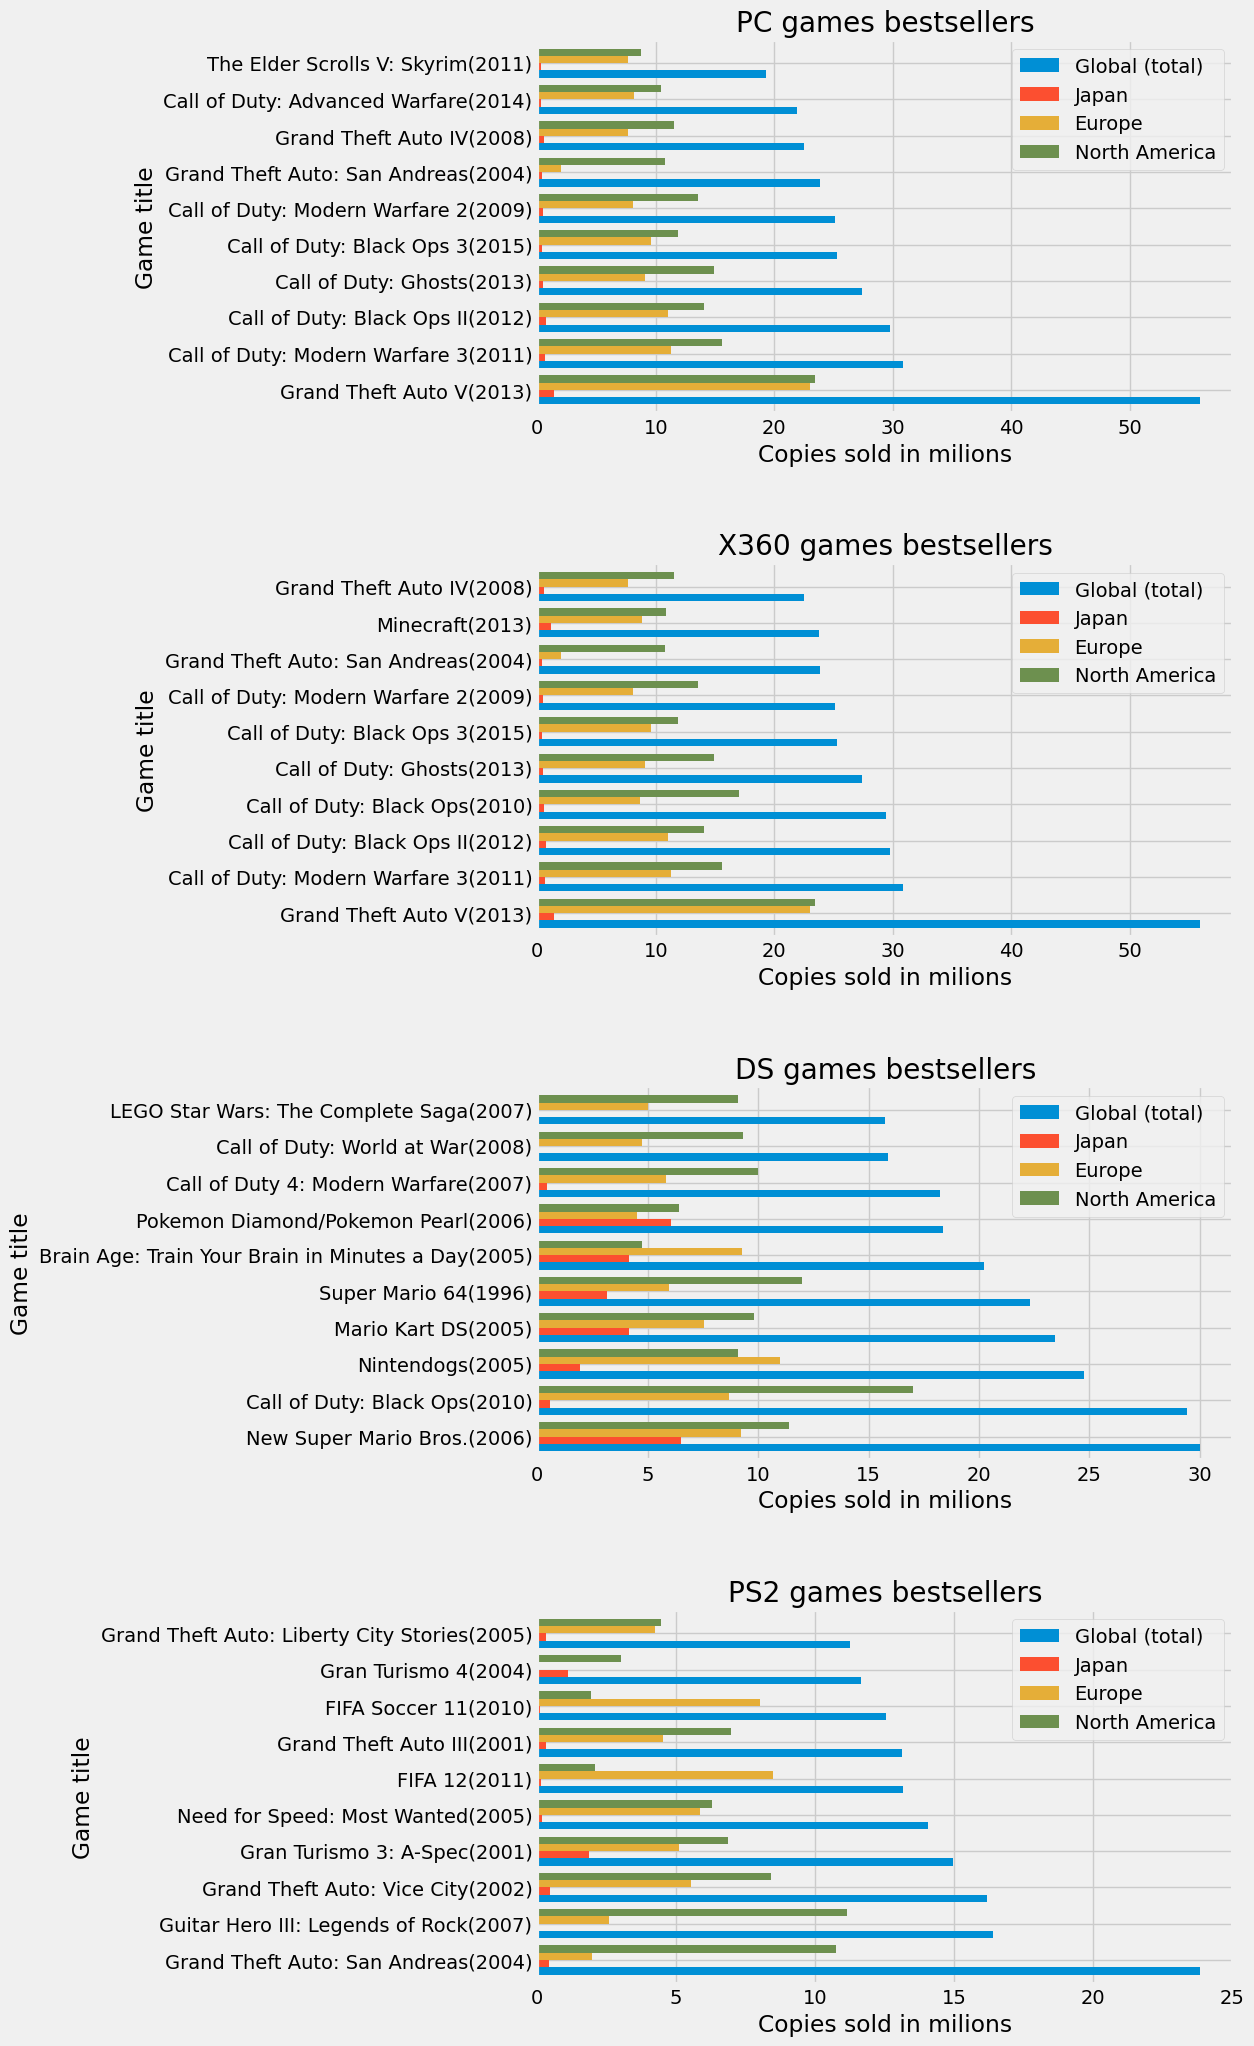

In [264]:
# display bestsellers for 4 platforms
fig, ax = plt.subplots(4,1,figsize=(8,24))
fig.subplots_adjust(hspace=0.4)

add_barplot("Platform","PC",0) 
add_barplot("Platform","X360",1) 
add_barplot("Platform","DS",2) 
add_barplot("Platform","PS2",3) 

### Let's explore publishers

Which publisher sold the most games?

In [265]:
publisher_total_sales =df.groupby(["Publisher"]).agg({"Global_Sales":"sum",'NA_Sales':"sum",'EU_Sales':"sum",'JP_Sales':"sum"})\
.sort_values(by="Global_Sales",ascending=False)
publisher_total_sales.head(10)

,Global_Sales,NA_Sales,EU_Sales,JP_Sales
Publisher,,,,
Nintendo,1784.43,815.75,418.30,454.99
Electronic Arts,1093.39,584.22,367.38,13.98
Activision,721.41,426.01,213.72,6.54
Sony Computer Entertainment,607.28,265.22,187.55,74.10
Ubisoft,473.25,252.54,163.03,7.33
Take-Two Interactive,399.30,220.47,117.95,5.83
THQ,340.44,208.60,94.60,5.01
Konami Digital Entertainment,278.56,88.91,68.62,90.93
Sega,270.66,108.78,81.41,56.15


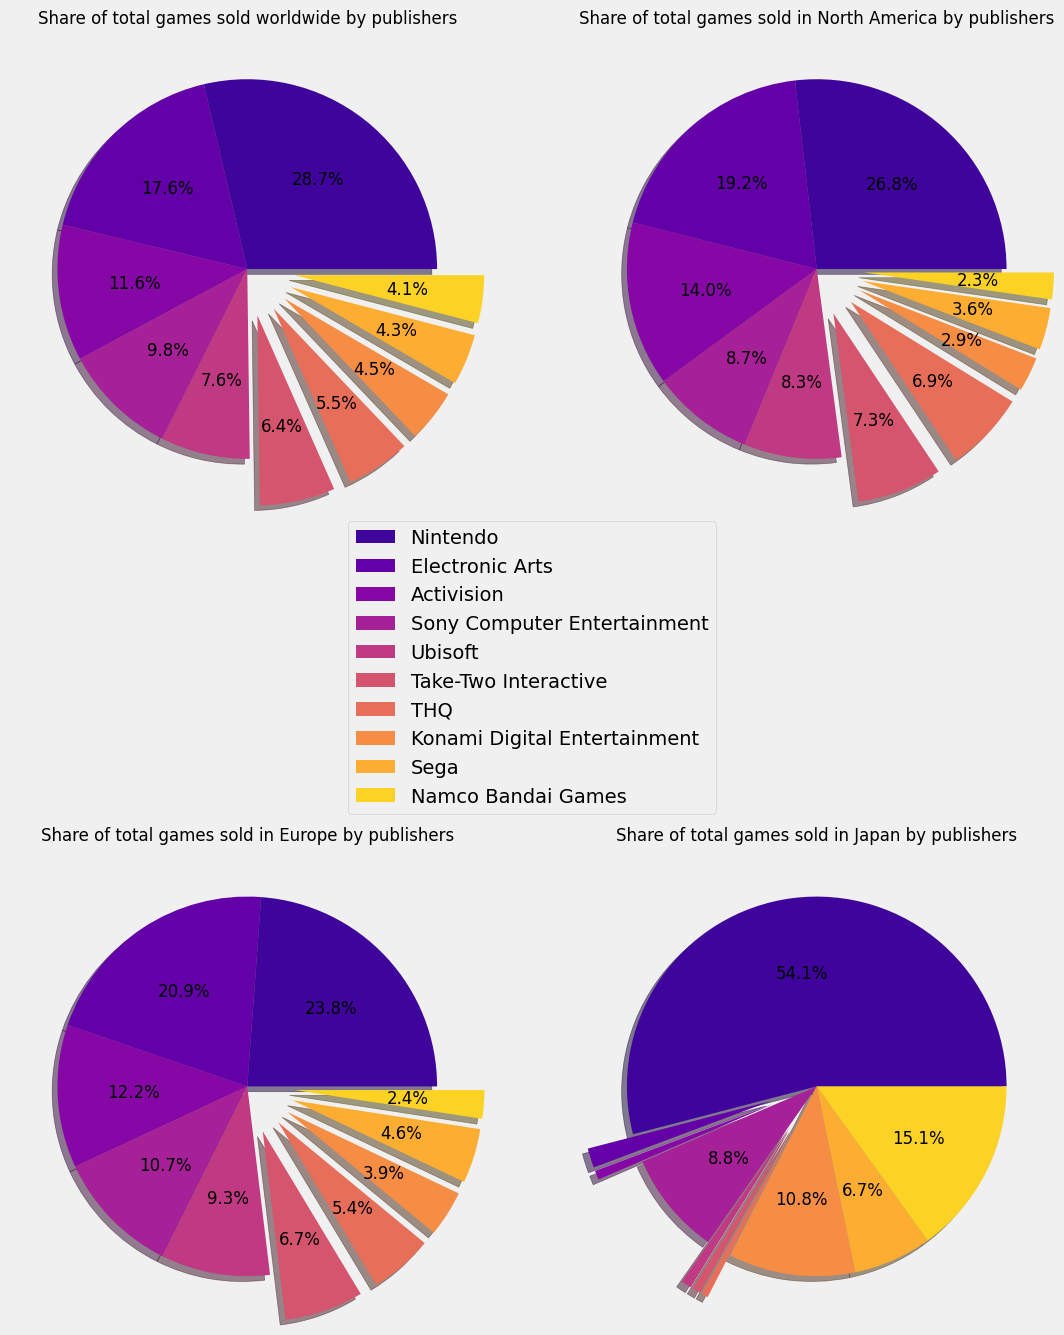

In [266]:
fig, ax = plt.subplots(2,2,figsize=(12,18.5))
# fig.subplots_adjust(hspace=0.1)

labels = publisher_total_sales.index.to_list()[:10]

# automate making pie charts wiht "exploded" parts belonging to the 5 smalles values and percentages displaying only above 2%
def add_piechart(region,ax_x,ax_y):
    def auto_explode():
        index_to_explode = publisher_total_sales[region].iloc[:10].reset_index(drop=True).sort_values().iloc[0:5].index.to_list()
        explode = np.zeros(10)
        explode[index_to_explode] = 0.25
        return explode  
    
    def auto_pct(pct):
        return '{:.1f}%'.format(pct) if pct > 2 else ''
            
    ax[ax_x,ax_y].pie(publisher_total_sales[region].iloc[:10],autopct=auto_pct,explode=auto_explode(),colors=sns.color_palette('plasma',10),
           textprops={'fontsize':12},shadow=True)
    
   




    
add_piechart("Global_Sales",0,0) 
ax[0,0].set_title("Share of total games sold worldwide by publishers",fontsize=12)
add_piechart("NA_Sales",0,1)
ax[0,1].set_title("Share of total games sold in North America by publishers",fontsize=12)
add_piechart("EU_Sales",1,0)    
ax[1,0].set_title("Share of total games sold in Europe by publishers",fontsize=12)
add_piechart("JP_Sales",1,1)
ax[1,1].set_title("Share of total games sold in Japan by publishers",fontsize=12)

fig.legend(labels=labels,loc="center")


plt.show()

Exploring the Market Dominance of Nintendo

In [267]:
colors= sns.color_palette('RdBu',10)

nintendo_sales_platform = df.groupby(["Publisher","Platform"])\
.agg({'NA_Sales':"sum",'EU_Sales':"sum",'JP_Sales':"sum","Other_Sales":"sum"})

nintendo_sales_platform = nintendo_sales_platform.loc["Nintendo"].sort_values(by="Other_Sales",ascending=False)

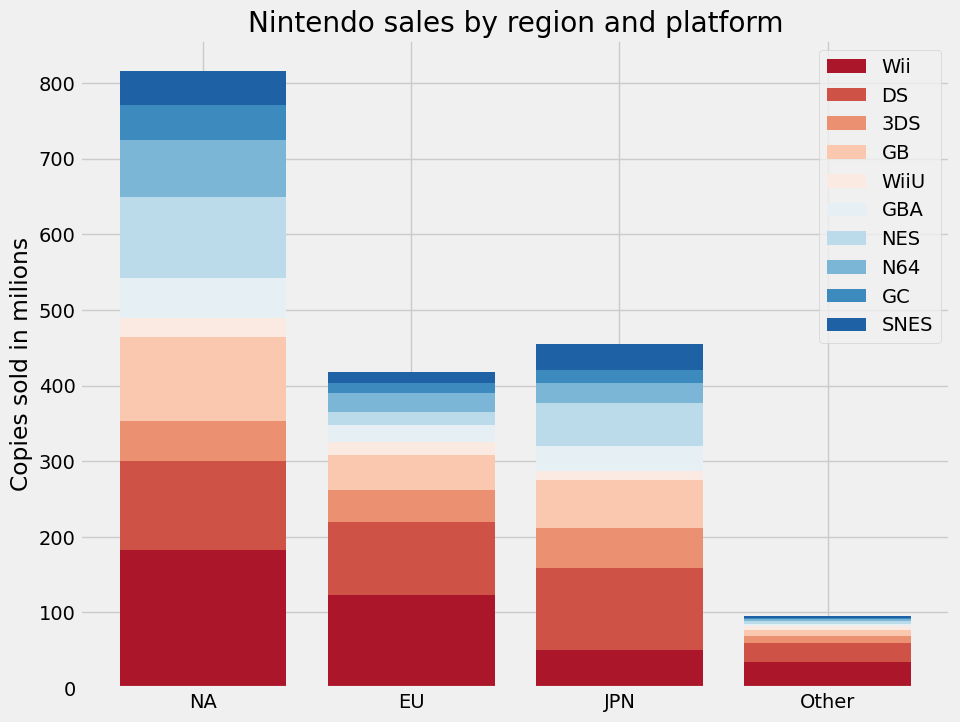

In [268]:
plt.figure(figsize = (10,8))

index = nintendo_sales_platform.index.to_list()
for v,i in enumerate(index):
    if v == 0:
        plt.bar(x=["NA","EU","JPN","Other"],height=nintendo_sales_platform.iloc[v],label=i,color=colors[v])
    else:
        plt.bar(x=["NA","EU","JPN","Other"],height=nintendo_sales_platform.iloc[v],bottom=nintendo_sales_platform.iloc[:v].sum(),label=i,color=colors[v])

plt.title("Nintendo sales by region and platform")
plt.ylabel("Copies sold in milions")
plt.legend()


In [269]:
colors2 = sns.color_palette('PRGn',10)

nintendo_sales_titles = df.groupby(["Publisher","Name"])\
.agg({'NA_Sales':"sum",'EU_Sales':"sum",'JP_Sales':"sum","Other_Sales":"sum"})

nintendo_sales_titles = nintendo_sales_titles.loc["Nintendo"].sort_values(by="Other_Sales",ascending=False)[:10]

Text(0, 0.5, 'Copies sold in milions')

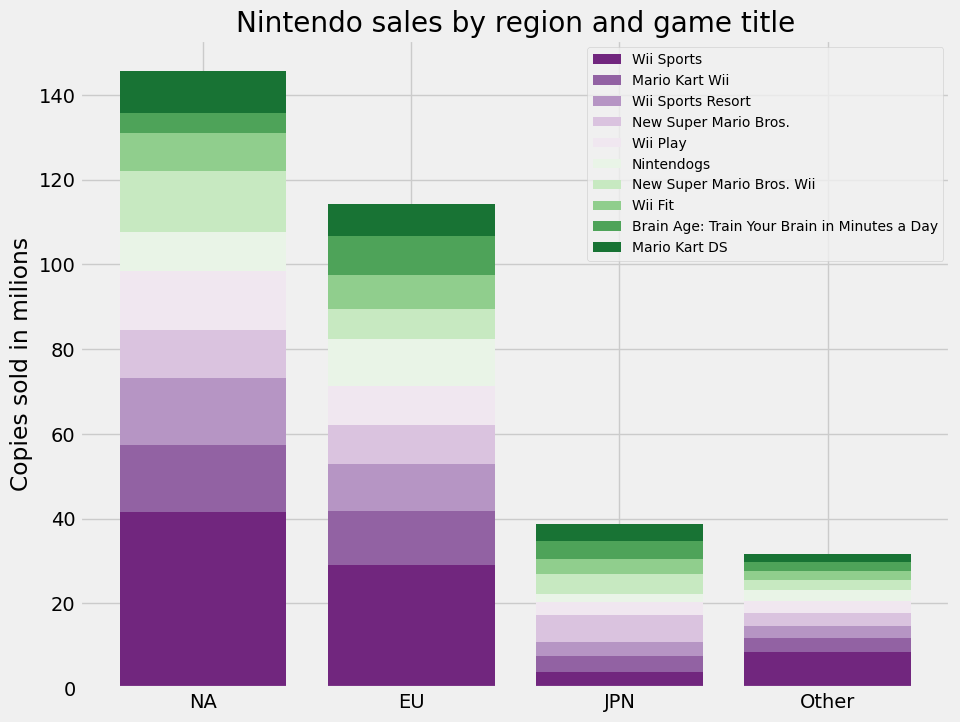

In [270]:
plt.figure(figsize = (10,8))

index = nintendo_sales_titles.index.to_list()
for v,i in enumerate(index):
    if v == 0:
        plt.bar(x=["NA","EU","JPN","Other"],height=nintendo_sales_titles.iloc[v],label=i,color=colors2[v])
    else:
        plt.bar(x=["NA","EU","JPN","Other"],height=nintendo_sales_titles.iloc[v],
                bottom=nintendo_sales_titles.iloc[:v].sum(),label=i,color=colors2[v])

plt.title("Nintendo sales by region and game title")
plt.legend(prop={'size': 10})
plt.ylabel("Copies sold in milions")


Nintendo sales through years

In [271]:
nintendo_sales_year = df.groupby(["Publisher","Year"])["Global_Sales"].sum()
nintendo_sales_year = nintendo_sales_year.loc["Nintendo"]

Finding out what game release caused increase in sale

In [272]:
# The goal of the find_peak() function is to identify the years when a specified publisher's 
# sales peaked and return the games released by that publisher in those years.
def find_peak(df,publisher):
    def find_peak_years():
        peak_list = []

        df_inner = df.loc[df["Publisher"] == publisher]

        sales = df_inner.groupby("Year")["Global_Sales"].sum().reset_index(drop=True)

        if sales.iloc[0] <= sales.iloc[1]:
            going_up=True
            peak_list.append("-")
        else:
            going_up=False
            peak_list.append("peak")

        for index in range(1,len(sales)-1):
            if going_up:
                if sales.iloc[index] <= sales.iloc[index+1]:
                    peak_list.append("-")
                else:
                    going_up=False
                    peak_list.append("peak")


            else:
                if sales.iloc[index] <= sales.iloc[index+1]:
                    going_up=True
                    peak_list.append("-")
                else:
                    peak_list.append("-")

        if sales.iloc[-1] <= sales.iloc[-2]:
            going_up=True
            peak_list.append("-")
        else:
            going_up=False
            peak_list.append("peak")                   

        sales = df_inner.groupby("Year")["Global_Sales"].sum().to_frame()
        sales["peaks"] = peak_list
        return sales.loc[sales["peaks"]=="peak"].index

    peak_release = df.loc[(df["Publisher"] == publisher) & (df["Year"].isin(find_peak_years())) ]

    return peak_release.sort_values(by="Global_Sales",ascending=False).drop_duplicates("Year").sort_values(by="Year")[["Year","Name"]]


In [273]:
nintendo_peaks = find_peak(df,"Nintendo")
nintendo_peaks

,Year,Name
1,1985.0,Super Mario Bros.
5,1989.0,Tetris
50,1992.0,Super Mario Land 2: 6 Golden Coins
71,1994.0,Donkey Kong Country
4,1996.0,Pokemon Red/Pokemon Blue
12,1999.0,Pokemon Gold/Pokemon Silver
25,2002.0,Pokemon Ruby/Pokemon Sapphire
0,2006.0,Wii Sports
3,2009.0,Wii Sports Resort
64,2012.0,New Super Mario Bros. 2


Text(0, 0.5, 'Copies sold in milions')

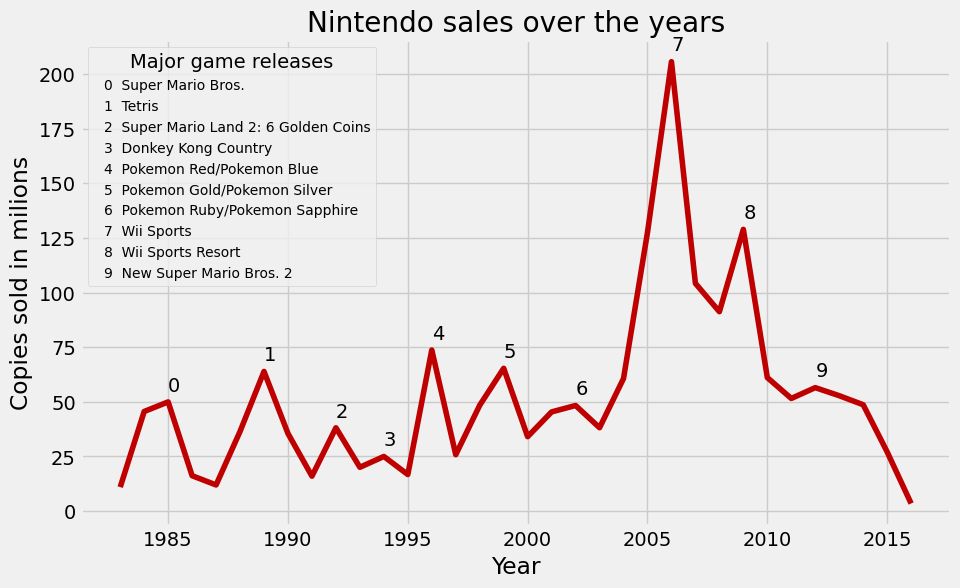

In [274]:

sns.lineplot(x=nintendo_sales_year.index,y=nintendo_sales_year.values,color="#BF0000")
# use these "hit games" for each time period to label local values peaks
for x in range(len(nintendo_peaks)):
    plt.annotate(x, (nintendo_peaks.iloc[x]["Year"], 
                                nintendo_sales_year.loc[nintendo_peaks.iloc[x]["Year"]]+5))
    
for x in range(len(nintendo_peaks)):
    plt.plot([],[],label=f"{x}  {nintendo_peaks.iloc[x]['Name']}")
    
plt.legend(handlelength=0, handleheight=0,fontsize=10,title="Major game releases")   
plt.title("Nintendo sales over the years")
plt.ylabel("Copies sold in milions")



### Other publishers sales

First, it's a good idea to encapsulate the previous proccess within a function.

In [298]:
def sales_by_years(df,column,sub_category,axis,color="blue",single_plot=True):
    sub_category_sales_year = df.groupby([column,"Year"])["Global_Sales"].sum()
    sub_category_sales_year = sub_category_sales_year.loc[sub_category]
    
#     sub_category_sales_year = df.loc[df[column] == sub_category].groupby("Year")["Global_Sales"].sum()

        
    def find_peak():
        def find_peak_years():
            peak_list = []

            df_inner = df.loc[df[column] == sub_category]

            sales = df_inner.groupby("Year")["Global_Sales"].sum().reset_index(drop=True)

            if sales.iloc[0] <= sales.iloc[1]:
                going_up=True
                peak_list.append("-")
            else:
                going_up=False
                peak_list.append("peak")

            for index in range(1,len(sales)-1):
                if going_up:
                    if sales.iloc[index] <= sales.iloc[index+1]:
                        peak_list.append("-")
                    else:
                        going_up=False
                        peak_list.append("peak")


                else:
                    if sales.iloc[index] <= sales.iloc[index+1]:
                        going_up=True
                        peak_list.append("-")
                    else:
                        peak_list.append("-")

            if sales.iloc[-1] <= sales.iloc[-2]:
                going_up=True
                peak_list.append("-")
            else:
                going_up=False
                peak_list.append("peak")                   

            sales = df_inner.groupby("Year")["Global_Sales"].sum().to_frame()
            sales["peaks"] = peak_list
            return sales.loc[sales["peaks"]=="peak"].index

        peak_release = df.loc[(df[column] == sub_category) & (df["Year"].isin(find_peak_years())) ]

        return peak_release.sort_values(by="Global_Sales",ascending=False).drop_duplicates("Year")\
    .sort_values(by="Year")[["Year","Name"]]
        
    sub_categry_peaks = find_peak()    
    sns.lineplot(x=sub_category_sales_year.index,y=sub_category_sales_year.values,ax=ax[axis],color=color,label=sub_category)
    
    if single_plot:
        for x in range(len(sub_categry_peaks)):
            ax[axis].annotate(x, (sub_categry_peaks.iloc[x]["Year"], 
                                        sub_category_sales_year.loc[sub_categry_peaks.iloc[x]["Year"]]+1))

        for x in range(len(sub_categry_peaks)):
            ax[axis].plot([],[],label=f"{x}  {sub_categry_peaks.iloc[x]['Name']}")


        ax[axis].legend(handlelength=0, handleheight=0,fontsize=8,title="Major game releases")   
        ax[axis].title.set_text(f"{sub_category} sales over the years")
        
    ax[axis].set_ylabel("Copies sold in milions")        
        
        

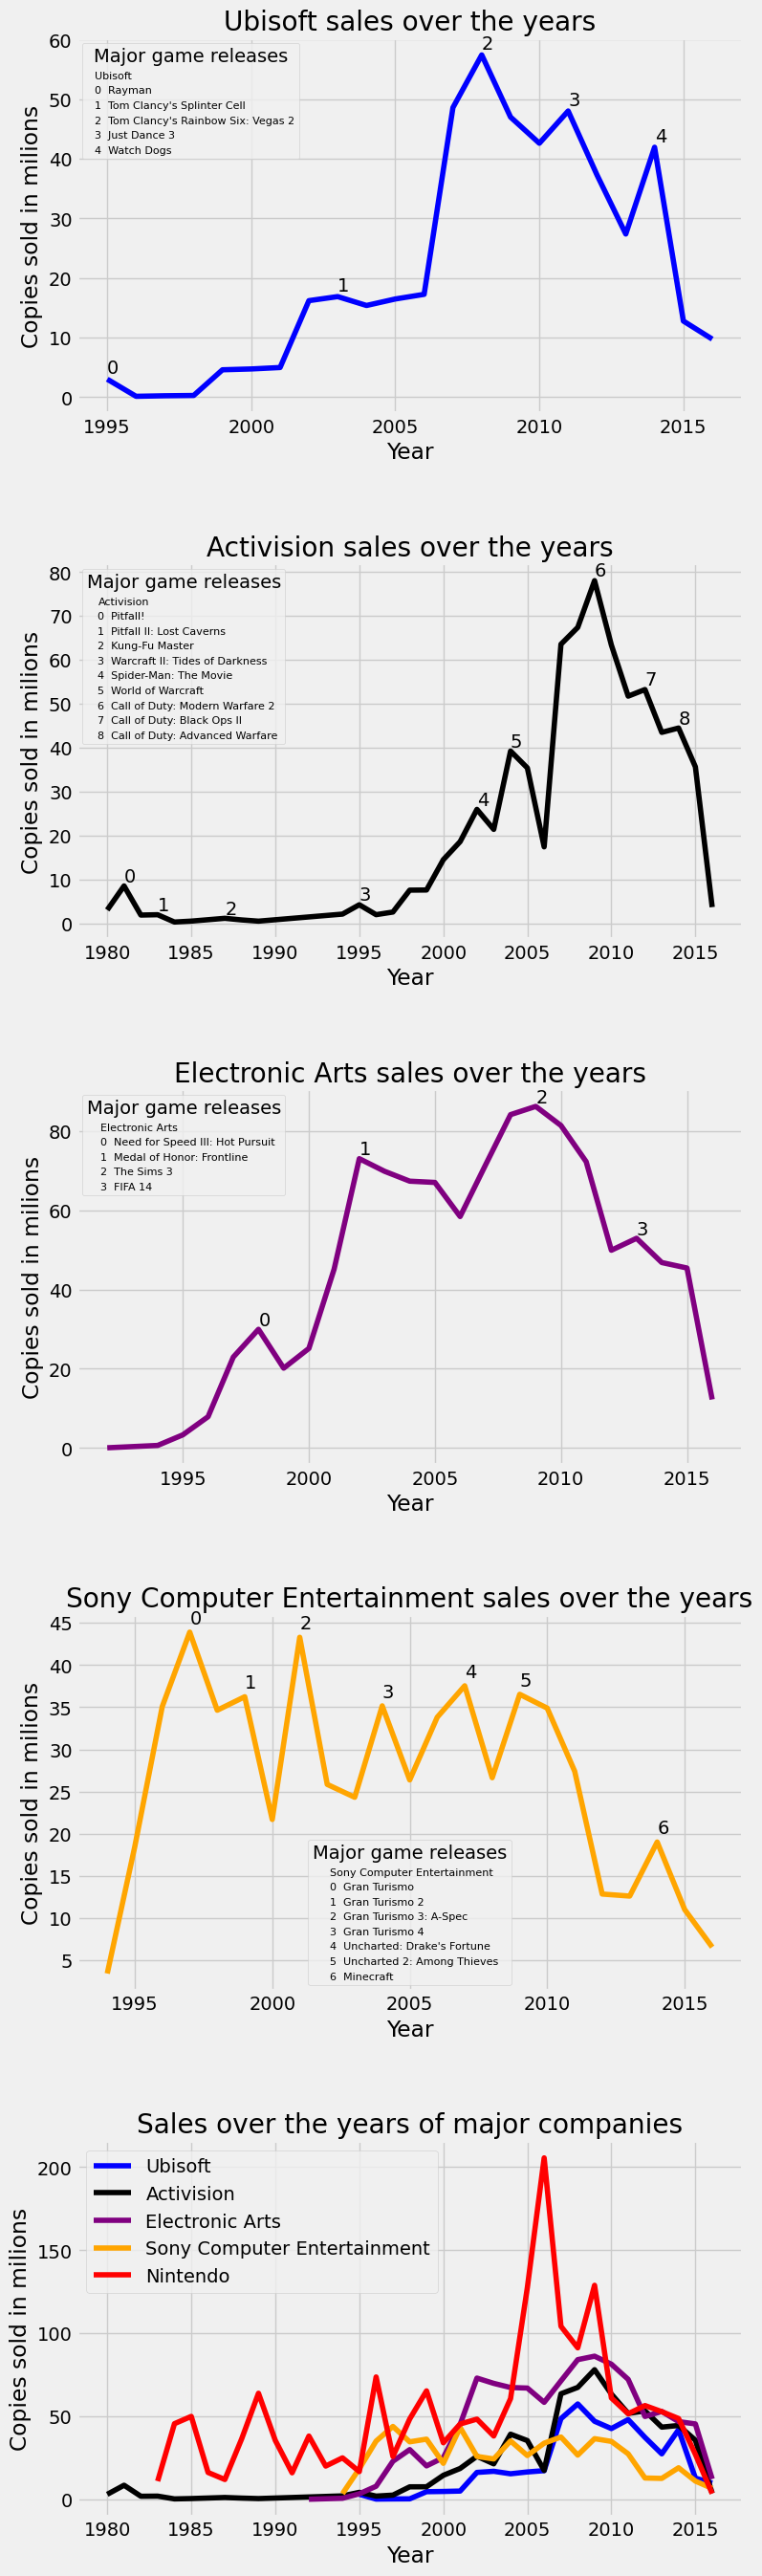

In [276]:
fig,ax = plt.subplots(5,1,figsize=(8,32))
fig.subplots_adjust(hspace=0.4)

sales_by_years(df,"Publisher","Ubisoft",0)
sales_by_years(df,"Publisher","Activision",1,"black")
sales_by_years(df,"Publisher","Electronic Arts",2,"purple")
sales_by_years(df,"Publisher","Sony Computer Entertainment",3,"orange")

sales_by_years(df,"Publisher","Ubisoft",4,single_plot=False)
sales_by_years(df,"Publisher","Activision",4,"black",single_plot=False)
sales_by_years(df,"Publisher","Electronic Arts",4,"purple",single_plot=False)
sales_by_years(df,"Publisher","Sony Computer Entertainment",4,"orange",single_plot=False)
sales_by_years(df,"Publisher","Nintendo",4,"red",single_plot=False)
ax[4].title.set_text("Sales over the years of major companies")

### Different  game genres sales over the years

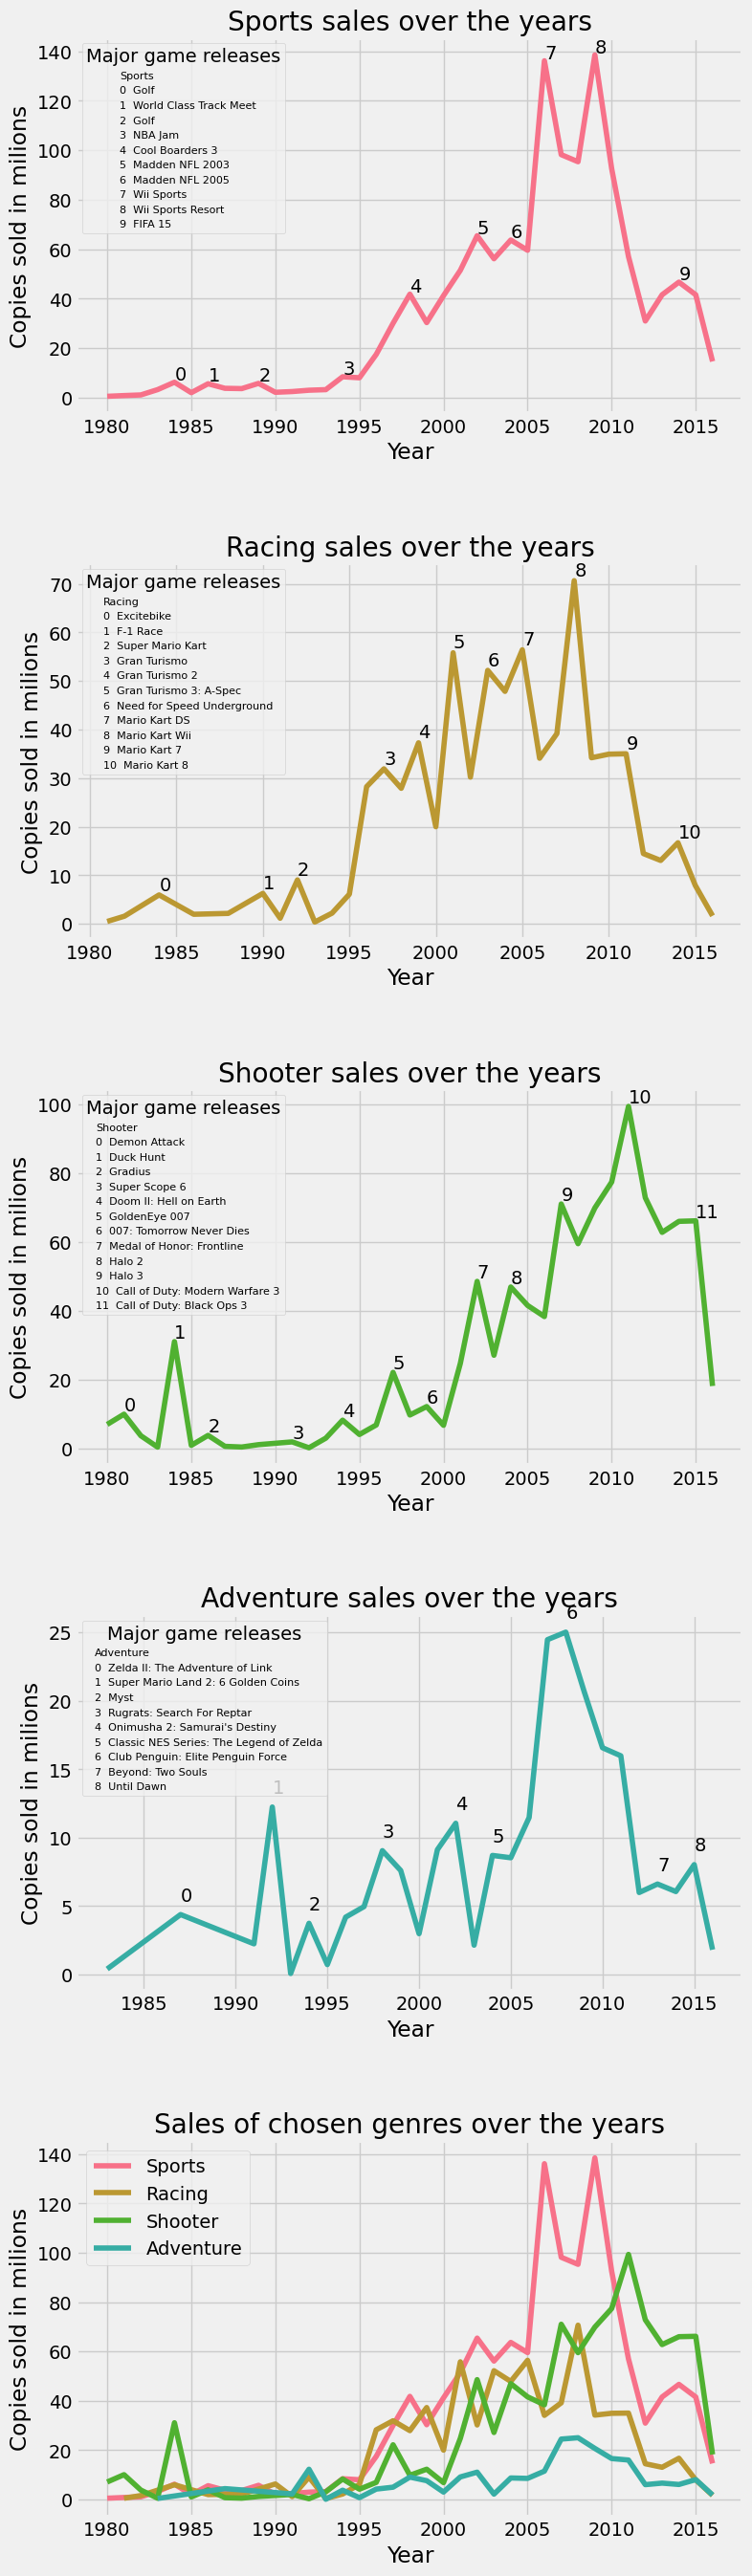

In [308]:
fig,ax = plt.subplots(5,1,figsize=(8,32))
fig.subplots_adjust(hspace=0.4)

genres = ["Sports","Racing","Shooter","Adventure"]
colors = sns.color_palette('husl')

for x in range(len(genres)):
    sales_by_years(df,"Genre",genres[x],x,color=colors[x])

for x in range(len(genres)):
    sales_by_years(df,"Genre",genres[x],4,color=colors[x],single_plot=False)
    
ax[4].title.set_text("Sales of chosen genres over the years")

### Sales for different platforms over the years

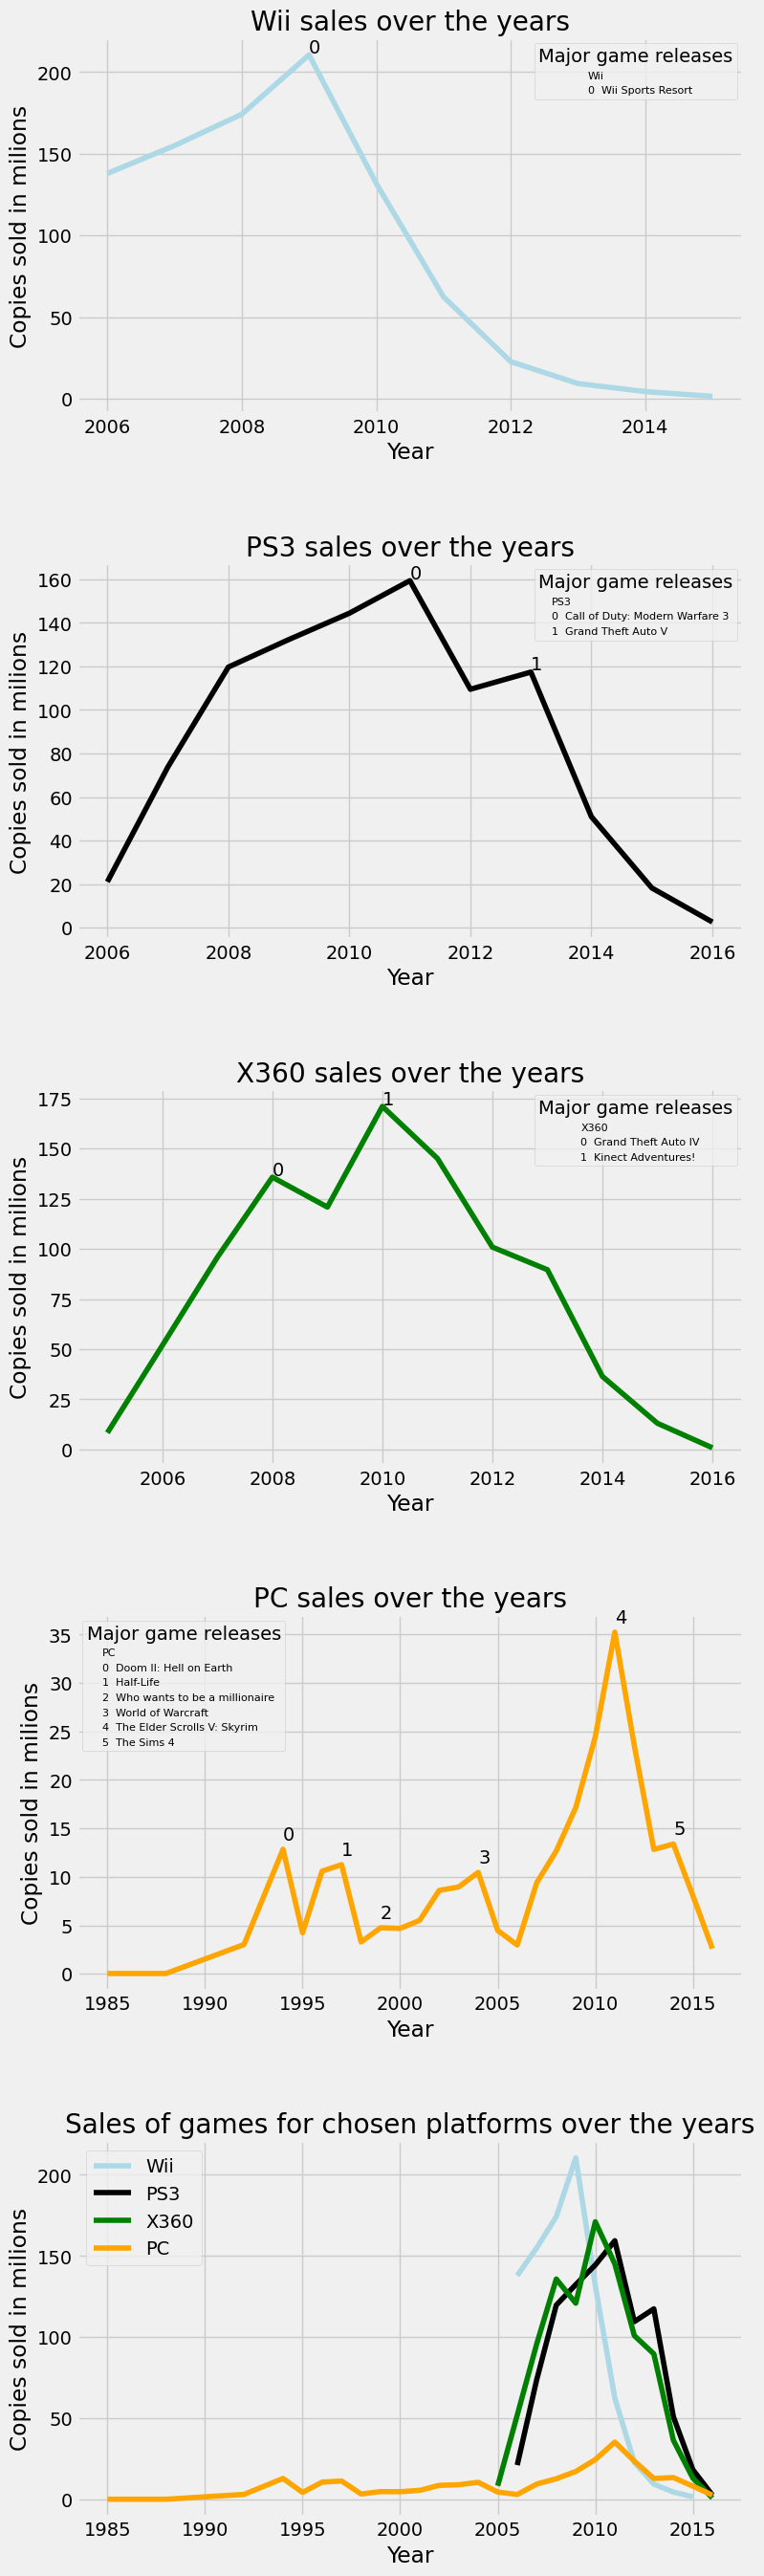

In [317]:
fig,ax = plt.subplots(5,1,figsize=(8,32))
fig.subplots_adjust(hspace=0.4)

platforms = ["Wii","PS3","X360","PC"]
colors = ["lightblue","black","green","orange"]

for x in range(len(genres)):
    sales_by_years(df,"Platform",platforms[x],x,color=colors[x])

for x in range(len(genres)):
    sales_by_years(df,"Platform",platforms[x],4,color=colors[x],single_plot=False)
    
ax[4].title.set_text("Sales of games for chosen platforms over the years")